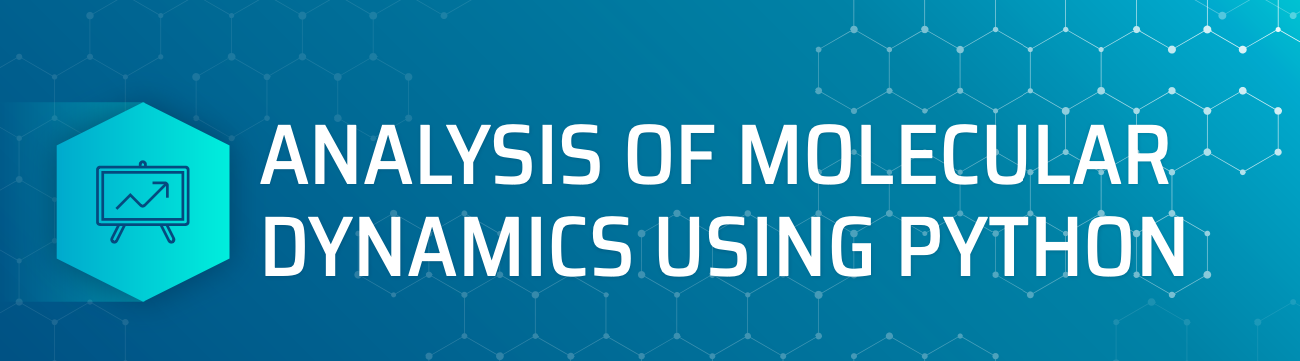

Presented by Lucy Jiménez. Adapted and inspired by [MDAnalysis](https://www.mdanalysis.org/docs/documentation_pages/overview.html).

# 1. Installing MDAnalysis

In [1]:
!pip install --upgrade MDAnalysis[analysis]

Requirement already up-to-date: MDAnalysis[analysis] in /srv/conda/envs/notebook/lib/python3.7/site-packages (1.0.0)
     |████████████████████████████████| 6.8 MB 5.8 MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1315 sha256=6f44a9a07f06414ccec84629465561e761aa0a8da23d99f70a62607fc0bb51ac
  Stored in directory: /home/jovyan/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


In [2]:
!pip install --upgrade MDAnalysisTests

     |████████████████████████████████| 47.7 MB 28.2 MB/s eta 0:00:01
     |████████████████████████████████| 270 kB 63.7 MB/s eta 0:00:01
     |████████████████████████████████| 321 kB 57.5 MB/s eta 0:00:01
     |████████████████████████████████| 43 kB 6.2 MB/s  eta 0:00:01
     |████████████████████████████████| 99 kB 21.6 MB/s eta 0:00:01
  Created wheel for MDAnalysisTests: filename=MDAnalysisTests-1.0.0-py2.py3-none-any.whl size=47955245 sha256=bff6a18cbcc69972054769bf83cb933fda791a778cae46dcf187db5999d4ba41
  Stored in directory: /home/jovyan/.cache/pip/wheels/f0/58/3d/f4d2f56341e54af77657939a2076403c3575f14acea4159d9b
Successfully built MDAnalysisTests


## Installing nglview

In [3]:
!pip install nglview

In [4]:
!jupyter nbextension enable --py --sys-prefix nglview

Enabling notebook extension nglview-js-widgets/extension...
      - Validating: OK



# 2. Loading MDAnalysis and other libraries

In [5]:
import MDAnalysis as mda

import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import nglview as nv

## MDA version

In [6]:
print(mda.__version__)

1.0.0


## 2.1. Checking tests datafiles

Let's use 2 examples of molecular systems that come in MDAnalysis.

__Example 1.__ The PSF and DCD file are a closed-form-to-open-form transition of Adenylate Kinase (from [Beckstein2009](https://www.sciencedirect.com/science/article/abs/pii/S0022283609011164?via%3Dihub))

In [8]:
from MDAnalysisTests.datafiles import PSF, DCD
u = mda.Universe(PSF, DCD)

In [9]:
print(u.atoms)

<AtomGroup [<Atom 1: N of type 56 of resname MET, resid 1 and segid 4AKE>, <Atom 2: HT1 of type 2 of resname MET, resid 1 and segid 4AKE>, <Atom 3: HT2 of type 2 of resname MET, resid 1 and segid 4AKE>, ..., <Atom 3339: C of type 32 of resname GLY, resid 214 and segid 4AKE>, <Atom 3340: OT1 of type 72 of resname GLY, resid 214 and segid 4AKE>, <Atom 3341: OT2 of type 72 of resname GLY, resid 214 and segid 4AKE>]>


In [10]:
print(u.trajectory)

<DCDReader /srv/conda/envs/notebook/lib/python3.7/site-packages/MDAnalysisTests/data/adk_dims.dcd with 98 frames of 3341 atoms>


__Example 2.__ The PDB ans XTC file are ten frames from a Gromacs simulation of AdK solvated in TIP4P water with the OPLS/AA force field.

### <font color='blue'>__Exercise 1:__</font>  

Load topology and trajectory for the simulation of AdK solvated. Use "v" to call the universe of this simulations.
* How many atoms are there? 
* Check the number of frames in the trajectory


# 3. Reading files input

Reading files input from a GROMACS XTC trajectory.

In [ ]:
# u_gromacs = mda.Universe('topology.gro', 'trajectory.xtc')

Loads two CHARMM/NAMD DCD files and concatenates them

In [ ]:
# u_charmm = mda.Universe('topology.psf', 'trajectory1.dcd', 'trajectory2.dcd')

Reading files input from a AMBER CRD trajectory.

In [ ]:
# u_amber = mda.Universe('top.prmtop', 'traj.crd', format='TRJ')

## How to use it?

Loading my AMBER trajectory for the simulation of *Asp*RedAm from the fungus *Aspergillus oryzae*:

In [ ]:
u_1 = mda.Universe('datafiles/structure.pdb','datafiles/short_traj.crd', dt = 0.020, format='TRJ')
ref = mda.Universe('datafiles/structure.pdb')   # reference structure
u_1.trajectory

In [ ]:
print(ref)

In [ ]:
print(u_1, u_1.trajectory.dt, u_1.trajectory.n_frames)

In [ ]:
prot = u_1.select_atoms('protein')
view_md_prot = nv.show_mdanalysis(prot)
view_md_prot

### <font color='blue'>__Exercise 2:__</font>  
Load your own topology and trajectory. 
* How many atoms are there? 
* Check the number of frames in the trajectory. 
* Visualize your simulation!


# 4. Selection commands

## 4.1 Usual selections

Atoms, residues, range of residues. [More options](https://docs.mdanalysis.org/2.0.0-dev0/documentation_pages/selections.html)

In [27]:
u = mda.Universe(PSF, DCD)
print(u)

<Universe with 3341 atoms>


In [28]:
print(u.atoms)

<AtomGroup [<Atom 1: N of type 56 of resname MET, resid 1 and segid 4AKE>, <Atom 2: HT1 of type 2 of resname MET, resid 1 and segid 4AKE>, <Atom 3: HT2 of type 2 of resname MET, resid 1 and segid 4AKE>, ..., <Atom 3339: C of type 32 of resname GLY, resid 214 and segid 4AKE>, <Atom 3340: OT1 of type 72 of resname GLY, resid 214 and segid 4AKE>, <Atom 3341: OT2 of type 72 of resname GLY, resid 214 and segid 4AKE>]>


Selecting a segment as the segid given in the topology.

In [29]:
seg_name = u.select_atoms("segid 4AKE")

Selecting atoms and residues range.

In [30]:
list(u.atoms[:5])

[<Atom 1: N of type 56 of resname MET, resid 1 and segid 4AKE>,
 <Atom 2: HT1 of type 2 of resname MET, resid 1 and segid 4AKE>,
 <Atom 3: HT2 of type 2 of resname MET, resid 1 and segid 4AKE>,
 <Atom 4: HT3 of type 2 of resname MET, resid 1 and segid 4AKE>,
 <Atom 5: CA of type 22 of resname MET, resid 1 and segid 4AKE>]

In [31]:
list(u.select_atoms("resid 2:4"))

[<Atom 20: N of type 54 of resname ARG, resid 2 and segid 4AKE>,
 <Atom 21: HN of type 1 of resname ARG, resid 2 and segid 4AKE>,
 <Atom 22: CA of type 22 of resname ARG, resid 2 and segid 4AKE>,
 <Atom 23: HA of type 6 of resname ARG, resid 2 and segid 4AKE>,
 <Atom 24: CB of type 23 of resname ARG, resid 2 and segid 4AKE>,
 <Atom 25: HB1 of type 3 of resname ARG, resid 2 and segid 4AKE>,
 <Atom 26: HB2 of type 3 of resname ARG, resid 2 and segid 4AKE>,
 <Atom 27: CG of type 23 of resname ARG, resid 2 and segid 4AKE>,
 <Atom 28: HG1 of type 3 of resname ARG, resid 2 and segid 4AKE>,
 <Atom 29: HG2 of type 3 of resname ARG, resid 2 and segid 4AKE>,
 <Atom 30: CD of type 23 of resname ARG, resid 2 and segid 4AKE>,
 <Atom 31: HD1 of type 3 of resname ARG, resid 2 and segid 4AKE>,
 <Atom 32: HD2 of type 3 of resname ARG, resid 2 and segid 4AKE>,
 <Atom 33: NE of type 57 of resname ARG, resid 2 and segid 4AKE>,
 <Atom 34: HE of type 2 of resname ARG, resid 2 and segid 4AKE>,
 <Atom 35: CZ 

In [32]:
ten = u.select_atoms("resid 20:30")
print(ten)
ten_view = nv.show_mdanalysis(ten,gui=True)
ten_view

<AtomGroup [<Atom 282: N of type 54 of resname ILE, resid 20 and segid 4AKE>, <Atom 283: HN of type 1 of resname ILE, resid 20 and segid 4AKE>, <Atom 284: CA of type 22 of resname ILE, resid 20 and segid 4AKE>, ..., <Atom 460: HG1 of type 1 of resname SER, resid 30 and segid 4AKE>, <Atom 461: C of type 20 of resname SER, resid 30 and segid 4AKE>, <Atom 462: O of type 70 of resname SER, resid 30 and segid 4AKE>]>


NGLWidget(max_frame=97)

Selecting by residue name.

In [33]:
list(u.select_atoms("resname LYS"))

[<Atom 175: N of type 54 of resname LYS, resid 13 and segid 4AKE>,
 <Atom 176: HN of type 1 of resname LYS, resid 13 and segid 4AKE>,
 <Atom 177: CA of type 22 of resname LYS, resid 13 and segid 4AKE>,
 <Atom 178: HA of type 6 of resname LYS, resid 13 and segid 4AKE>,
 <Atom 179: CB of type 23 of resname LYS, resid 13 and segid 4AKE>,
 <Atom 180: HB1 of type 3 of resname LYS, resid 13 and segid 4AKE>,
 <Atom 181: HB2 of type 3 of resname LYS, resid 13 and segid 4AKE>,
 <Atom 182: CG of type 23 of resname LYS, resid 13 and segid 4AKE>,
 <Atom 183: HG1 of type 3 of resname LYS, resid 13 and segid 4AKE>,
 <Atom 184: HG2 of type 3 of resname LYS, resid 13 and segid 4AKE>,
 <Atom 185: CD of type 23 of resname LYS, resid 13 and segid 4AKE>,
 <Atom 186: HD1 of type 3 of resname LYS, resid 13 and segid 4AKE>,
 <Atom 187: HD2 of type 3 of resname LYS, resid 13 and segid 4AKE>,
 <Atom 188: CE of type 23 of resname LYS, resid 13 and segid 4AKE>,
 <Atom 189: HE1 of type 3 of resname LYS, resid 13 

Selecting by atom name.

In [34]:
calphas = u.select_atoms("name CA")
print(calphas)

<AtomGroup [<Atom 5: CA of type 22 of resname MET, resid 1 and segid 4AKE>, <Atom 22: CA of type 22 of resname ARG, resid 2 and segid 4AKE>, <Atom 46: CA of type 22 of resname ILE, resid 3 and segid 4AKE>, ..., <Atom 3298: CA of type 22 of resname ILE, resid 212 and segid 4AKE>, <Atom 3317: CA of type 22 of resname LEU, resid 213 and segid 4AKE>, <Atom 3336: CA of type 23 of resname GLY, resid 214 and segid 4AKE>]>


Subselections.

In [35]:
nterm = u.select_atoms('segid 4AKE and name N')[0]  # can access structure via segid (s4AKE) and atom name
cterm = u.select_atoms('segid 4AKE and name C')[-1]  # ... takes the last atom named 'C'

print(nterm)
print(cterm)

<Atom 1: N of type 56 of resname MET, resid 1 and segid 4AKE>
<Atom 3339: C of type 32 of resname GLY, resid 214 and segid 4AKE>


In [36]:
list(u.select_atoms("resname MET and (name CA)"))

[<Atom 5: CA of type 22 of resname MET, resid 1 and segid 4AKE>,
 <Atom 303: CA of type 22 of resname MET, resid 21 and segid 4AKE>,
 <Atom 498: CA of type 22 of resname MET, resid 34 and segid 4AKE>,
 <Atom 788: CA of type 22 of resname MET, resid 53 and segid 4AKE>,
 <Atom 1452: CA of type 22 of resname MET, resid 96 and segid 4AKE>,
 <Atom 2719: CA of type 22 of resname MET, resid 174 and segid 4AKE>]

Selecting by by molecule type.

In [37]:
bb = u.select_atoms("backbone")
print(bb)

<AtomGroup [<Atom 1: N of type 56 of resname MET, resid 1 and segid 4AKE>, <Atom 5: CA of type 22 of resname MET, resid 1 and segid 4AKE>, <Atom 18: C of type 20 of resname MET, resid 1 and segid 4AKE>, ..., <Atom 3334: N of type 54 of resname GLY, resid 214 and segid 4AKE>, <Atom 3336: CA of type 23 of resname GLY, resid 214 and segid 4AKE>, <Atom 3339: C of type 32 of resname GLY, resid 214 and segid 4AKE>]>


In [38]:
protein = u.select_atoms("protein")
w = nv.show_mdanalysis(protein,gui=True)
w

NGLWidget(max_frame=97)

### <font color='blue'>__Exercise 3:__</font>  
1. Selects the atoms that are at positions 500 to 510.
2. What are the residues in positions 57 to 60?
3. Select all the CB atoms.
4. Select all the HG21 atoms for the ILE residue.
5. Visualize/display the selection of point 1.

## 4.2 Geometric selections

By distance, spherical layer, xyz position.

Around distance selection.

In [ ]:
res40_5 = u.select_atoms("around 5 resid 40")
print(res40_5)

In [ ]:
around = nv.show_mdanalysis(res40_5,gui=True)
around

Atoms within a spherical layer centered in the center of geometry (COG) of a given selection.
* COG: protein, resid 130, resid 80
* Spherical layer: inner radius 2.4 and external radius 6.0

In [ ]:
spherical_layer = u.select_atoms("sphlayer 2.4 6.0 ( protein and ( resid 130 or resid 80 ) )")
print(spherical_layer)

In [ ]:
layer = nv.show_mdanalysis(spherical_layer,gui=True)
layer
#Use ball+stick representation

Atoms within a cutoff of a point in space.
* Coordinate (5.0, 5.0, 5.0)
* All atoms within 3.5 Angstrom

In [ ]:
xyz_select = u.select_atoms("point 5.0 5.0 5.0 3.5")
print(xyz_select)

### <font color='blue'>__Exercise 4:__</font>  

1. Select atoms, residues, protein and water molecules using the trajectory for the simulation of AdK solvated. 
2. Choose one residue and take a look at the molecules that are within 3.5 Angstroms.
3. Use [sphzone externalRadius selection](https://docs.mdanalysis.org/2.0.0-dev0/documentation_pages/selections.html) and visualize all atoms within a spherical zone. 

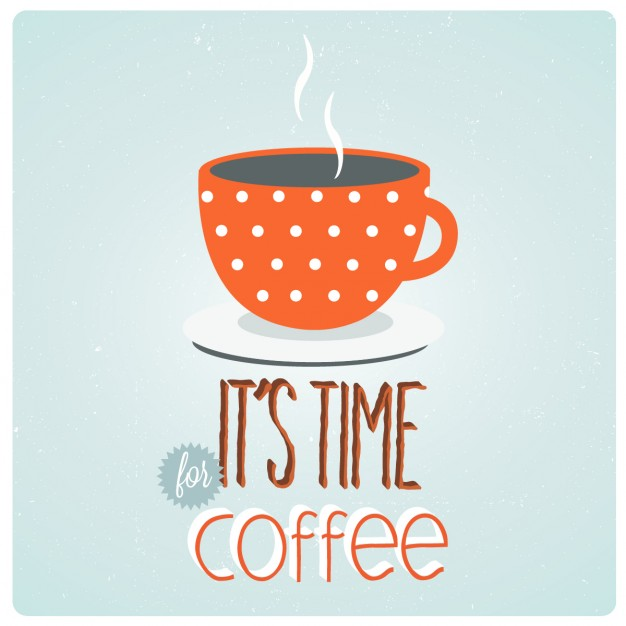


# 5. Analysis modules

# 5.1 Coordinate fitting and alignment

Typically, one selects a group of atoms (such as the C-alphas), calculates the RMSD and transformation matrix, and applys the transformation to the current frame of a trajectory to obtain the rotated structure. 

The `alignto()` and `AlignTraj` functions can be used to do this for individual frames and trajectories respectively.

### RMSD-fitting 

Importing analysis modules and the example uses files.

In [11]:
from MDAnalysis.analysis import align
from MDAnalysis.analysis.rms import rmsd
from MDAnalysisTests.datafiles import PSF, DCD, PDB_small
print(PDB_small)

/srv/conda/envs/notebook/lib/python3.7/site-packages/MDAnalysisTests/data/adk_open.pdb


Calculate the C-alpha RMSD between two structures, using rmsd():

In [13]:
ref = mda.Universe(PDB_small)
mobile = mda.Universe(PSF,DCD)
rmsd(mobile.select_atoms("name CA").positions, ref.select_atoms("name CA").positions)

28.20178579474479

Note that in this example translations have not been removed. In order to look at the pure rotation one needs to superimpose the centres of mass (or geometry) first

In [14]:
rmsd(mobile.select_atoms("name CA").positions, ref.select_atoms("name CA").positions, center=True)

21.892591663632704

This has only done a translational superposition. To also do a rotational superposition use the superposition keyword. This will calculate a minimized RMSD between the reference and mobile structure.

In [15]:
rmsd(mobile.select_atoms('name CA').positions, ref.select_atoms('name CA').positions, superposition=True)

6.809396586471815

The rotation matrix that superimposes mobile on ref while minimizing the CA-RMSD is obtained with the rotation_matrix() function

In [17]:
mobile0 = mobile.select_atoms('name CA').positions - mobile.atoms.center_of_mass()
ref0 = ref.select_atoms('name CA').positions - ref.atoms.center_of_mass()
R, rmsd = align.rotation_matrix(mobile0, ref0)
print(rmsd)
print(R)

6.809734371595011
[[ 0.14516661 -0.2726127   0.95110934]
 [ 0.88653002  0.4626632  -0.00269863]
 [-0.4393076   0.84357873  0.3088426 ]]


Putting all this together one can superimpose all of mobile onto ref:

In [18]:
mobile.atoms.translate(-mobile.select_atoms('name CA').center_of_mass())
mobile.atoms.rotate(R)
mobile.atoms.translate(ref.select_atoms('name CA').center_of_mass())
# mobile.atoms.write("mobile_on_ref.pdb")

<AtomGroup with 3341 atoms>

### <font color='blue'>__Exercise 5:__</font>  

Calculate a minimized RMSD between the reference and mobile structure using the simulation of AdK solvated.

### To fit a single structure with `alignto()`

This will change all coordinates in mobile so that the protein C-alpha atoms are optimally superimposed (translation and rotation).

In [19]:
ref = mda.Universe(PSF, PDB_small)
mobile = mda.Universe(PSF, DCD)     # we use the first frame
align.alignto(mobile, ref, select="protein and name CA", weights="mass")

(21.892591663632704, 6.809396586471809)

### To fit a whole trajectory to a reference structure with the `AlignTraj` class:

In [21]:
ref = mda.Universe(PSF, PDB_small)   # reference structure 1AKE
trj = mda.Universe(PSF, DCD)         # trajectory of change 1AKE->4AKE
alignment = align.AlignTraj(trj, ref, filename='rmsfit.dcd')
alignment.run()

### <font color='blue'>__Exercise 6:__</font>  

Fit a whole trajectory to a reference structure using the simulation of AdK solvated.

### Calculating RMSD for multiple domains

In this example we will globally fit a protein to a reference structure and investigate the relative movements of domains by computing the RMSD of the domains to the reference. The example is a DIMS trajectory of adenylate kinase, which samples a large closed-to-open transition. The protein consists of the CORE, LID, and NMP domain. 

* Superimpose on the closed structure (frame 0 of the trajectory), using backbone atoms
* Calculate the backbone RMSD and RMSD for CORE, LID, NMP (backbone atoms)


PSF, DCD is the reference closed AdK (1AKE) (with the default ref_frame=0).

ref = MDAnalysis.Universe(PSF,CRD) is the reference open AdK (4AKE)

In [22]:
from MDAnalysisTests.datafiles import PSF, DCD, CRD
u = mda.Universe(PSF, DCD)
ref = mda.Universe(PSF,DCD)

In [23]:
import MDAnalysis.analysis.rms

R = MDAnalysis.analysis.rms.RMSD(u, ref,
           select="backbone",             # superimpose on whole backbone of the whole protein
           groupselections=["backbone and (resid 1-29 or resid 60-121 or resid 160-214)",   # CORE
                            "backbone and resid 122-159",                                   # LID
                            "backbone and resid 30-59"])                                    # NMP
R.run()

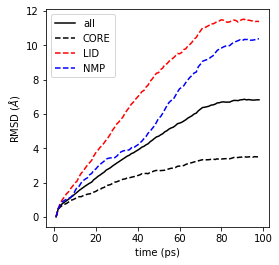

In [24]:
%matplotlib inline
rmsd = R.rmsd.T   # transpose makes it easier for plotting
time = rmsd[1]
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
ax.plot(time, rmsd[2], 'k-',  label="all")
ax.plot(time, rmsd[3], 'k--', label="CORE")
ax.plot(time, rmsd[4], 'r--', label="LID")
ax.plot(time, rmsd[5], 'b--', label="NMP")
ax.legend(loc="best")
ax.set_xlabel("time (ps)")
ax.set_ylabel(r"RMSD ($\AA$)")
fig.savefig("rmsd_all_CORE_LID_NMP_ref1AKE.pdf")
plt.show()

## Residue RMSF fluctuations

In this example we calculate the residue RMSF fluctuations by analyzing the Cα atoms.

In [42]:
from MDAnalysis.analysis.rms import RMSF

calphas = u.select_atoms("name CA")
rmsfer = RMSF(calphas, verbose=True).run()

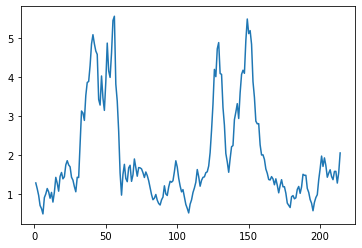

In [43]:
%matplotlib inline
plt.plot(calphas.resnums, rmsfer.rmsf)

## Radius of gyration

In the following example the end-to-end distance of a protein and the radius of gyration of the backbone atoms are calculated:

In [44]:
import numpy.linalg
u = mda.Universe(PSF,DCD)  # always start with a Universe
nterm = u.select_atoms('segid 4AKE and name N')[0]  # can access structure via segid (s4AKE) and atom name
cterm = u.select_atoms('segid 4AKE and name C')[-1]  # ... takes the last atom named 'C'
bb = u.select_atoms('protein and backbone')  # a selection (a AtomGroup)
for ts in u.trajectory:  # iterate through all frames
    r = (cterm.position - nterm.position)  # end-to-end vector from atom positions
    d = numpy.linalg.norm(r)   # end-to-end distance
    rgyr = bb.radius_of_gyration()  # method of a AtomGroup; updates with each frame
    print("frame = %d: d = %f Angstroem, Rgyr = %f Angstroem" % (ts.frame, d, rgyr))

frame = 0: d = 11.712210 Angstroem, Rgyr = 16.435122 Angstroem
frame = 1: d = 11.437789 Angstroem, Rgyr = 16.446380 Angstroem
frame = 2: d = 11.206519 Angstroem, Rgyr = 16.514263 Angstroem
frame = 3: d = 10.541850 Angstroem, Rgyr = 16.537609 Angstroem
frame = 4: d = 10.559649 Angstroem, Rgyr = 16.556085 Angstroem
frame = 5: d = 10.744684 Angstroem, Rgyr = 16.508550 Angstroem
frame = 6: d = 10.879876 Angstroem, Rgyr = 16.588098 Angstroem
frame = 7: d = 10.335635 Angstroem, Rgyr = 16.585375 Angstroem
frame = 8: d = 10.727634 Angstroem, Rgyr = 16.607155 Angstroem
frame = 9: d = 11.756330 Angstroem, Rgyr = 16.632735 Angstroem
frame = 10: d = 11.579390 Angstroem, Rgyr = 16.661953 Angstroem
frame = 11: d = 11.506628 Angstroem, Rgyr = 16.665241 Angstroem
frame = 12: d = 10.815601 Angstroem, Rgyr = 16.678477 Angstroem
frame = 13: d = 10.514074 Angstroem, Rgyr = 16.725833 Angstroem
frame = 14: d = 10.491043 Angstroem, Rgyr = 16.748083 Angstroem
frame = 15: d = 10.608440 Angstroem, Rgyr = 16.796

In [45]:
Rgyr = []
protein = u.select_atoms("protein")
for ts in u.trajectory:
   Rgyr.append((u.trajectory.time, protein.radius_of_gyration()))
Rgyr = np.array(Rgyr)

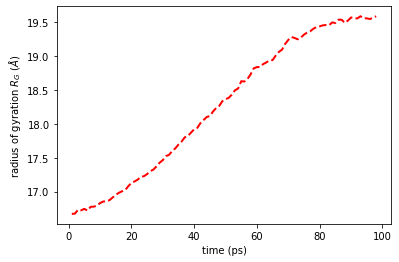

In [46]:
ax = plt.subplot(111)
ax.plot(Rgyr[:,0], Rgyr[:,1], 'r--', lw=2, label=r"$R_G$")
ax.set_xlabel("time (ps)")
ax.set_ylabel(r"radius of gyration $R_G$ ($\AA$)")
ax.figure.savefig("Rgyr.pdf")
plt.draw()

# 5.2 Native contacts analysis

This module contains classes to analyze native contacts Q over a trajectory. 

Native contacts of a conformation are contacts that exist in a reference structure and in the conformation. 

Contacts in the reference structure are always defined as being closer then a distance radius. 

The fraction of native contacts for a conformation can be calculated in different ways. This module supports 3 different metrics listed below, as well as custom metrics.

1. Hard Cut: To count as a contact the atoms i and j have to be at least as close as in the reference structure.
2. Soft Cut: The atom pair i and j is assigned based on a soft potential that is 1 if the distance is 0, 1/2 if the distance is the same as in the reference and 0 for large distances. For the exact definition of the potential and parameters have a look at function soft_cut_q().
3. Radius Cut: To count as a contact the atoms i and j cannot be further apart than some distance radius.

***
Suggested cutoff distances for different simulations
* For all-atom simulations, cutoff = 4.5 Å
* For coarse-grained simulations, cutoff = 6.0 Å

### One-dimensional contact analysis
As an example we analyze the opening (“unzipping”) of salt bridges when the AdK enzyme opens up.

Importing analysis modules and the example uses files.

In [ ]:
from MDAnalysis.analysis import contacts
from MDAnalysisTests.datafiles import PSF, DCD
u = mda.Universe(PSF,DCD)

Crude definition of salt bridges as contacts between NH/NZ in ARG/LYS and OE*/OD* in ASP/GLU. You might want to think a little bit harder about the problem before using this for real work.

In [ ]:
sel_basic = "(resname ARG LYS) and (name NH* NZ)"
sel_acidic = "(resname ASP GLU) and (name OE* OD*)"

Reference groups (first frame of the trajectory, but you could also use a separate PDB, eg crystal structure)

In [ ]:
acidic = u.select_atoms(sel_acidic)
basic = u.select_atoms(sel_basic)

Set up analysis of native contacts ("salt bridges"); salt bridges have a distance $<6 A$.

In [ ]:
ca1 = contacts.Contacts(u, select=(sel_acidic, sel_basic), refgroup=(acidic, basic), radius=6.0)
# iterate through trajectory and perform analysis of "native contacts" Q
ca1.run()

Print number of average contacts

In [ ]:
average_contacts = np.mean(ca1.timeseries[:, 1])
print('average contacts = {}'.format(average_contacts))

In [ ]:
%matplotlib inline
# plot time series q(t)
fig, ax = plt.subplots()
ax.plot(ca1.timeseries[:, 0], ca1.timeseries[:, 1])
ax.set(xlabel='frame', ylabel='fraction of native contacts',
       title='Native Contacts, average = {:.2f}'.format(average_contacts))
fig.show()

### Distance analysis

As an example we calculate the distance between two atoms.

In [ ]:
CA_1 = u.select_atoms("resid 1 and name CA") # Atom selection lig1-1
CA_30 = u.select_atoms("resid 30 and name CA") # Atom selection nad-1

DIS = []
for ts in u.trajectory:     # iterate through all frames
    C1 = CA_1.positions[0] # Coordinates C1
    C30 = CA_30.positions[0] # Coordinates C30
    d = C1 - C30 # vector from atom positions
    dist = np.linalg.norm(d) # end-to-end distance
    DIS.append((ts.frame, dist))
#    print(ts.frame, distNAD)

DIS_a = np.array(DIS)
#print(DIS_a)

In [ ]:
ax = plt.plot(DIS_a[:,0], DIS_a[:,1], 'c', lw=1.5)
plt.xlabel("frame")
plt.ylabel("Distance ($\AA$)")
plt.title('Distance CA_1 & CA30')
plt.savefig("dist.png")

# 5.3 Hydrogen Bond Analysis

## To guess the acceptor and hydrogen atoms, and to identify donor-hydrogen pairs

The simplest use case is to allow `HydrogenBondAnalysis` to guess the acceptor and hydrogen atoms, and to identify donor-hydrogen pairs via the bonding information in the topology:

In [ ]:
from MDAnalysisTests.datafiles import PSF, DCD, CRD
from MDAnalysis.analysis.hydrogenbonds.hbond_analysis import HydrogenBondAnalysis as HBA

u = mda.Universe(PSF, DCD)

hbonds = HBA(universe=u)
hbonds.run()

It is also possible to specify which hydrogens and acceptors to use in the analysis. For example, to find all hydrogen bonds in water:

In [ ]:
from MDAnalysis.analysis.hydrogenbonds.hbond_analysis import HydrogenBondAnalysis as HBA

u = mda.Universe(PSF, DCD)

hbonds = HBA(universe=u, hydrogens_sel="resname TIP3 and name H1 H2", acceptors_sel="resname TIP3 and name OH2")
#hbonds.run()

Alternatively, `hydrogens_sel` and `acceptors_sel` may be generated via the `guess_hydrogens` and `guess_acceptors``. 

This selection strings may then be modified prior to calling run, or a subset of the universe may be used to guess the atoms. For example, find hydrogens and acceptors belonging to a protein:

In [ ]:
from MDAnalysis.analysis.hydrogenbonds.hbond_analysis import HydrogenBondAnalysis as HBA

u = mda.Universe(PSF, DCD)

hbonds = HBA(universe=u)
hbonds.hydrogens_sel = hbonds.guess_hydrogens("protein")
hbonds.acceptors_sel = hbonds.guess_acceptors("protein")
hbonds.run()

## Hydrogen bonds between different groups

To calculate the hydrogen bonds between different groups, for example a protein and water, one can use the `between` keyword. The following will find protein-water hydrogen bonds but not protein-protein or water-water hydrogen bonds:

In [ ]:
from MDAnalysisTests.datafiles import PSF, DCD
from MDAnalysis.analysis.distances import *
from MDAnalysis.analysis.hydrogenbonds.hbond_analysis import HydrogenBondAnalysis as HBA

u = mda.Universe(PSF, DCD)

hbonds = HBA(universe=u, between=("resname TIP3","protein"))

In [ ]:
protein_hydrogens_sel = hbonds.guess_hydrogens("protein")
protein_acceptors_sel = hbonds.guess_acceptors("protein")

water_hydrogens_sel = "resname TIP3 and name H1 H2"
water_acceptors_sel = "resname TIP3 and name OH2"

hbonds.hydrogens_sel = f"({protein_hydrogens_sel}) or ({water_hydrogens_sel})"
hbonds.acceptors_sel = f"({protein_acceptors_sel}) or ({water_acceptors_sel})"

hbonds.run()

## How to perform WaterBridgeAnalysis

All water bridges between arginine and aspartic acid can be analysed with

In [ ]:
from MDAnalysisTests.datafiles import PSF, DCD
import MDAnalysis.analysis.hbonds

u = mda.Universe(PSF, DCD)
w = MDAnalysis.analysis.hbonds.WaterBridgeAnalysis(u, 'resname ARG', 'resname ASP')
w.run()

The maximum number of bridging waters detected can be changed using the order keyword.

In [ ]:
w = MDAnalysis.analysis.hbonds.WaterBridgeAnalysis(u, 'resname ARG', 'resname ASP', order=3)

An example of using the `WaterBridgeAnalysis` would be detecting the percentage of time a certain water bridge exits.

Trajectory u has two frames, where the first frame contains a water bridge from the oxygen of the first arginine to one of the oxygens in the carboxylic group of aspartate (ASP3:OD1). In the second frame, the same water bridge forms but is between the oxygen of the arginine and the other oxygen in the carboxylic group (ASP3:OD2).

In [ ]:
# index residue id residue name atom name
#     0          1          ARG         O
#     1          2          SOL        OW
#     2          2          SOL       HW1
#     3          2          SOL       HW2
#     4          3          ASP       OD1
#     5          3          ASP       OD2
print(w.timeseries)

In [ ]:
[ # frame 1
  # A water bridge SOL2 links O from ARG1 to the carboxylic group OD1 of ASP3
 [[0,2,('ARG',1,  'O'),('SOL',2,'HW1'),  3.0,180],
  [3,4,('SOL',2,'HW2'),('ASP',3,'OD1'),  3.0,180],
 ],
  # frame 2
  # Another water bridge SOL2 links O from ARG1 to the other oxygen of the
  # carboxylic group OD2 of ASP3
 [[0,2,('ARG',1,  'O'),('SOL',2,'HW1'),  3.0,180],
  [3,5,('SOL',2,'HW2'),('ASP',3,'OD2'),  3.0,180],
 ],
]

We can use the count_by_type() to generate the frequence of all water bridges in the simulation.

In [ ]:
w.count_by_type()

# 5.4 The solvent density around a protein of interest

Generate the density of water molecules around a protein.

In [ ]:
from MDAnalysisTests.datafiles import TPR, XTC
from MDAnalysis.analysis import density
u = mda.Universe(TPR, XTC)
ow = u.select_atoms("name OW")
D = density.DensityAnalysis(ow, delta=1.0)
D.run()
D.density.convert_density('TIP4P')

Recover a grid containing a histogram of atom counts, simply multiply by the volume dV of each bin (or voxel); in this case you need to ensure that the physical density is measured in Å-3 by converting it:

In [ ]:
# ensure that the density is A^{-3}
D.density.convert_density("A^{-3}")

dV = np.prod(D.density.delta)
atom_count_histogram = D.density.grid * dV

Writing the density to a file. The water.dx that can be read with VMD, PyMOL, or Chimera.

In [ ]:
D.density.export("water.dx", type="double")

# Look analysis for ...

## Dimensionality Reduction
-  [Principal Component Analysis (PCA)](https://docs.mdanalysis.org/2.0.0-dev0/documentation_pages/analysis/pca.html#pca-tutorial)

## Membranes and membrane proteins
- [HOLE](https://docs.mdanalysis.org/2.0.0-dev0/documentation_pages/analysis/hole2.html)
- [Leaflet identification](https://docs.mdanalysis.org/2.0.0-dev0/documentation_pages/analysis/leaflet.html)

## Nucleic acids
- [Nucleic acid analysis](https://docs.mdanalysis.org/2.0.0-dev0/documentation_pages/analysis/nuclinfo.html)

## Polymers
- [Polymer analysis](https://docs.mdanalysis.org/2.0.0-dev0/documentation_pages/analysis/polymer.html)